In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [4]:
avocado = pd.read_csv('avocado.csv')

In [8]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [9]:
avocado = avocado.sort_values("Date")

In [10]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


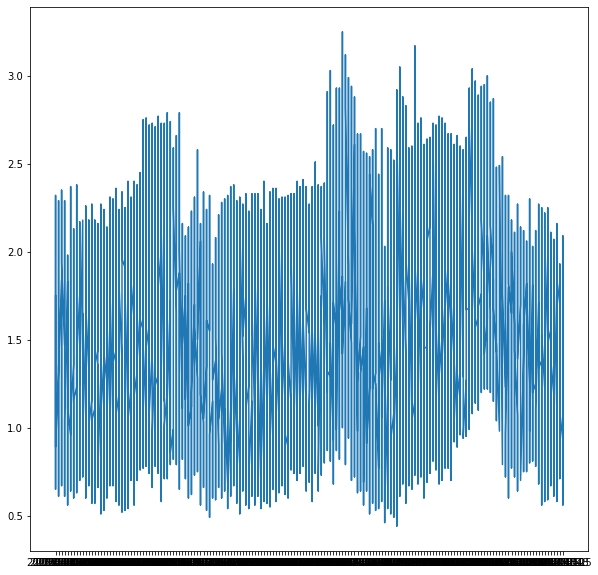

In [13]:
plt.figure(figsize = (10,10))
plt.plot(avocado['Date'], avocado['AveragePrice'])

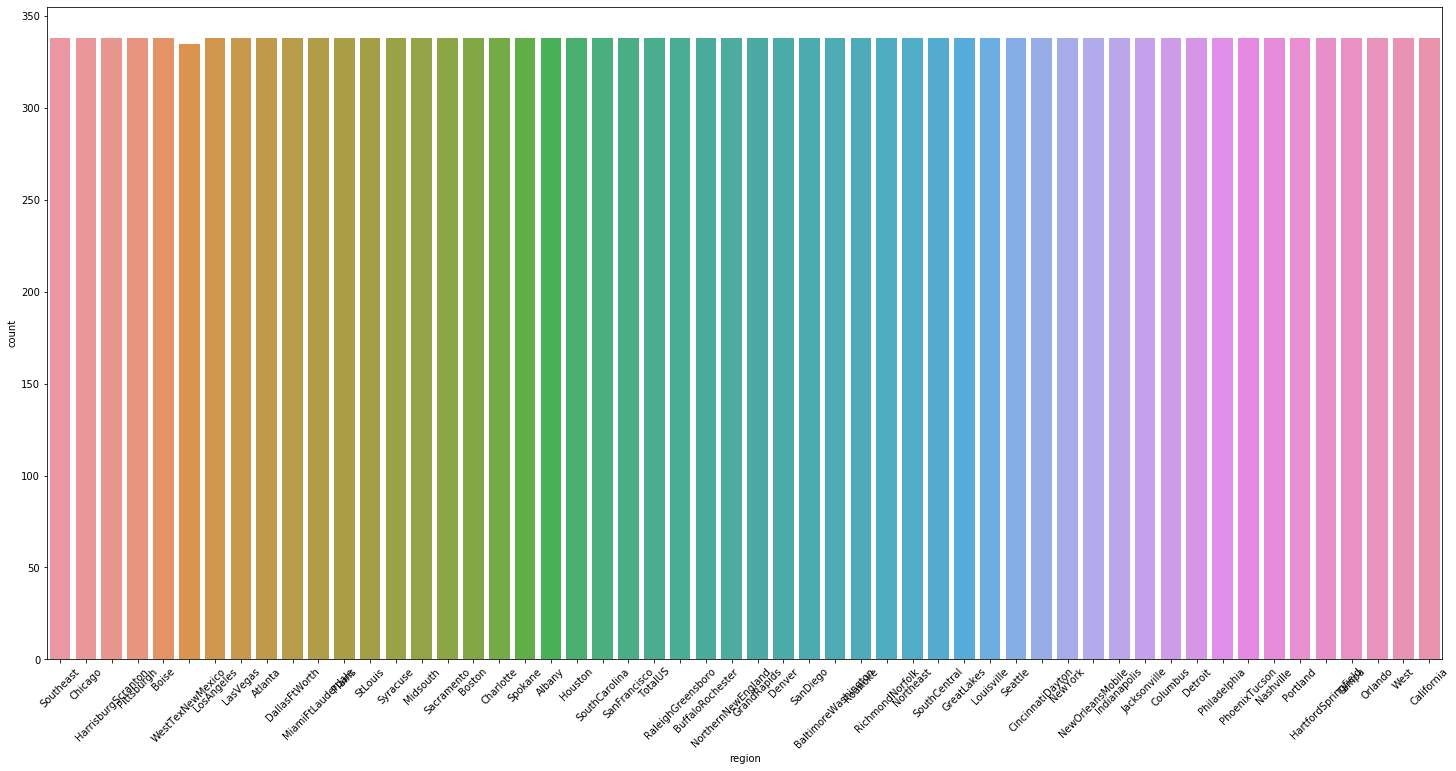

In [16]:
plt.figure(figsize = (25,12))
plt.xticks(rotation = 45)
sns.countplot(x = 'region', data = avocado)

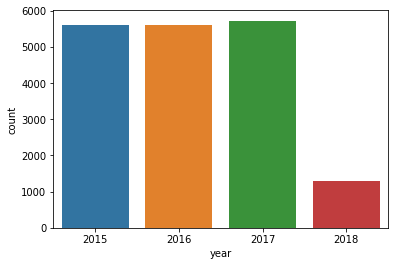

In [17]:
# compare the sales as compared to year

sns.countplot(x = 'year', data = avocado)

In [18]:
avocado_prophet = avocado[['Date','AveragePrice']]

In [19]:
avocado_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


In [23]:
avocado_prophet = avocado_prophet.rename(columns = {'Date':'ds','AveragePrice':'y'})

In [24]:
m = Prophet()


In [25]:
m.fit(avocado_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods=365)

In [29]:
forecast = m.predict(future)

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496497,0.921902,1.859752,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
1,2015-01-04,1.496497,0.925314,1.881204,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
2,2015-01-04,1.496497,0.887173,1.857122,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
3,2015-01-04,1.496497,0.890007,1.853437,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
4,2015-01-04,1.496497,0.890742,1.868327,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
5,2015-01-04,1.496497,0.903788,1.890440,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
6,2015-01-04,1.496497,0.893267,1.896882,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
7,2015-01-04,1.496497,0.925630,1.867839,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
8,2015-01-04,1.496497,0.902517,1.862368,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
9,2015-01-04,1.496497,0.881732,1.875621,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903


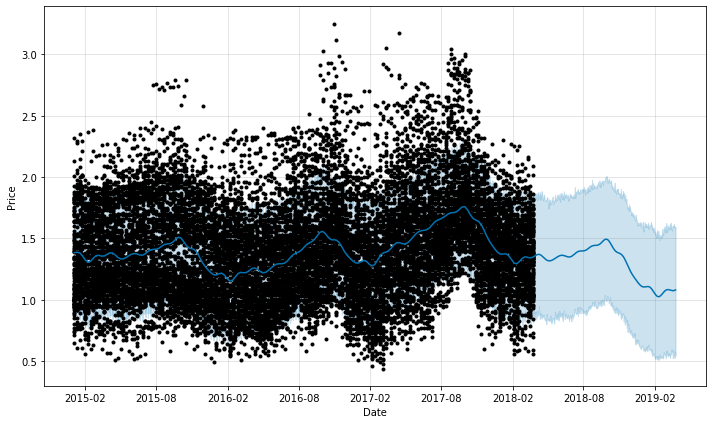

In [31]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

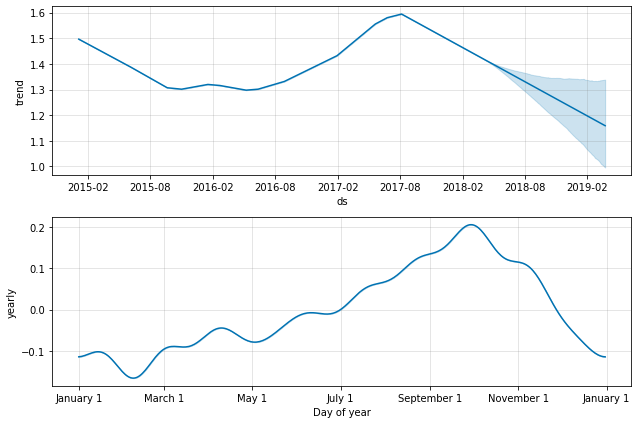

In [32]:
figure = m.plot_components(forecast)

In [33]:
#region specefic
avocado_sample = avocado[avocado['region'] == 'West']

In [34]:
avocado_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West
11878,48,2015-01-25,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,organic,2015,West
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West
11877,47,2015-02-01,1.34,216484.22,89599.59,82183.07,184.99,44516.57,11083.16,33433.41,0.00,organic,2015,West


In [35]:
avocado_sample = avocado_sample.sort_values('Date')

In [36]:
avocado_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West
11878,48,2015-01-25,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,organic,2015,West
11877,47,2015-02-01,1.34,216484.22,89599.59,82183.07,184.99,44516.57,11083.16,33433.41,0.00,organic,2015,West
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


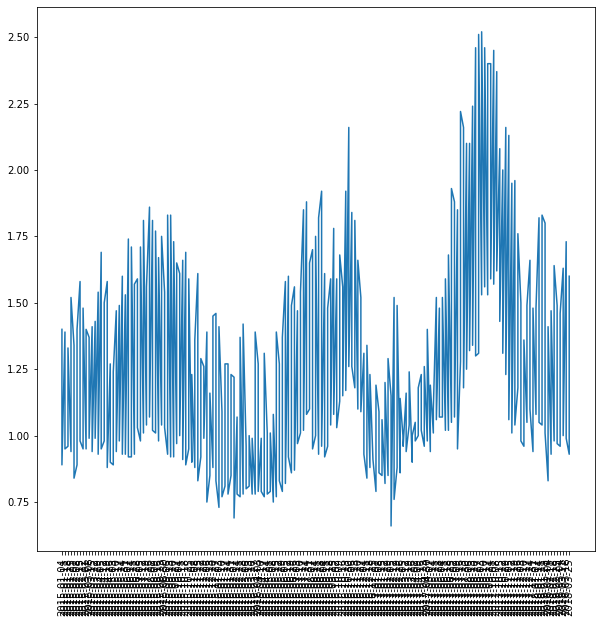

In [39]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
plt.plot(avocado_sample['Date'], avocado_sample['AveragePrice'])

In [43]:
avocado_sample_prophet = avocado_sample[['Date','AveragePrice']]

In [46]:
avocado_sample_prophet = avocado_sample_prophet.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [47]:
m = Prophet()
m.fit(avocado_sample_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future = m.make_future_dataframe(periods = 365)

In [49]:
forecast = m.predict(future)

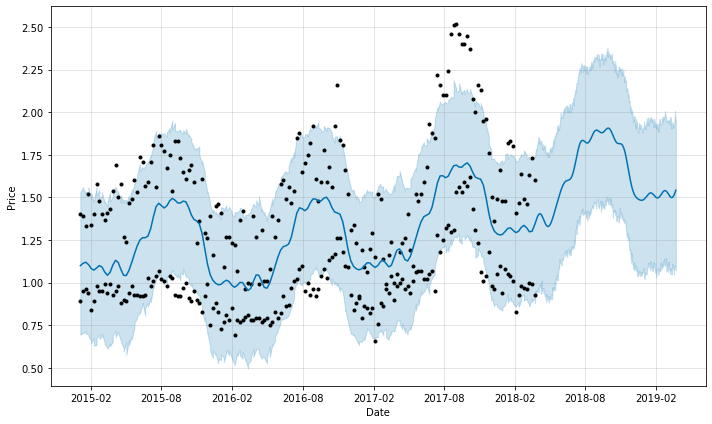

In [50]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

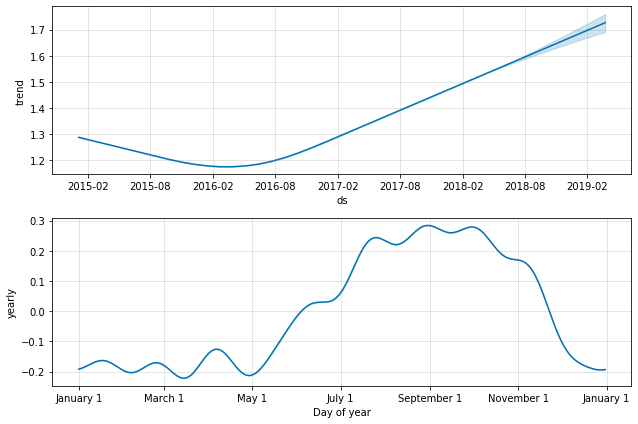

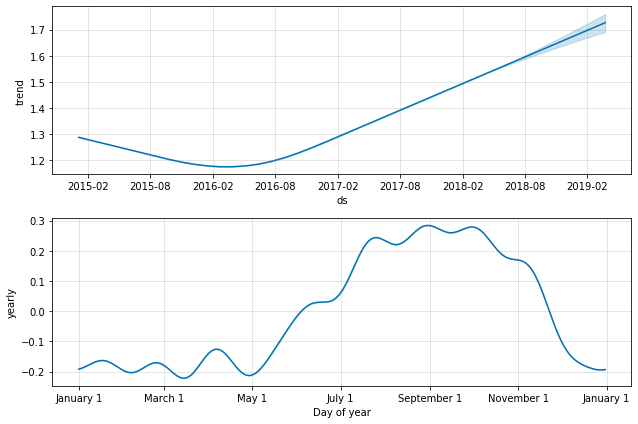

In [51]:
m.plot_components(forecast)